In [319]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

np.set_printoptions(precision=3,suppress=True)

In [281]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [282]:
df=pd.read_csv("lab9stuff/01_heights_weights_genders.csv")
df.head()



,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [344]:
def grid_cv(clf,df,param,target_name,label_name,features,regularized=True,cv=5):    
    
    df['target']=np.where(df[label_name]==target_name,0,1)
    df['reg_1']=df[[features[0]]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    df['reg_2']=df[[features[1]]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    
    if regularized:
        X = df[['reg_1','reg_2']].values
       
    else:
        X = df[features].values
    y = df.target.values
        
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.8)
    
    grid_searchCV = GridSearchCV(clf,param,cv=cv)
    grid_searchCV.fit(Xtrain,ytrain)
    return  grid_searchCV.best_estimator_,Xtrain,Xtest,ytrain,ytest
     

In [345]:
def classify(clf,df,params,target_name,label_name,features,regularized=False,cv=30):
    best_clf,Xtrain,Xtest,ytrain,ytest = grid_cv(clf,df,params,target_name,label_name,features,regularized=regularized,cv=cv)
    best_clf = best_clf.fit(Xtrain,ytrain)
    print best_clf.score(Xtrain,ytrain)
    print best_clf.score(Xtest,ytest)
    return best_clf,Xtrain,Xtest,ytrain,ytest
    

In [391]:
def plot_prediction(clf,Xtrain,Xtest,ytrain,ytest,mesh=False):
    X = np.concatenate((Xtrain,Xtest))
    y = np.concatenate((ytrain,ytest))
    print X.shape
    xmin,xmax = np.min(X[:,0]),np.max(X[:,0])
    ymin,ymax = np.min(X[:,1]),np.max(X[:,1])
    print xmin,xmax,ymin,ymax
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    
    if mesh:
        plt.pcolormesh(xx,yy,prediction.reshape(xx.shape),cmap=cmap_light, alpha=0.4)
    
    plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest,cmap=cmap_bold)
    plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=.2)
    cs2 = plt.contour(xx, yy, Z, cmap=cmap_bold, alpha=.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
    
    return xx,yy
    
    


In [393]:
params = {'C':[0.095,0.1,0.12,0.9,1,1.01,10]}
clf = LogisticRegression()
best_clf,Xtrain,Xtest,ytrain,ytest = classify(clf,df,params,'Female','Gender',['Height','Weight'],regularized=True,cv=30)

0.902
0.918625


(10000, 2)
-0.489352270215 0.510647729785 -0.471237916644 0.528762083356


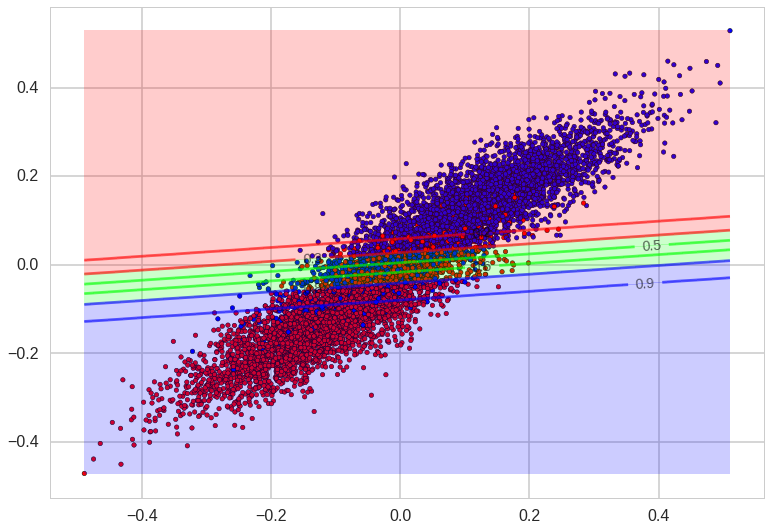

In [396]:
xx,yy = plot_prediction(best_clf,Xtrain,Xtest,ytrain,ytest,mesh=False)